# 06장 GPT-4o를 이용한 AI 이미지 분석가

## 06-1 GPT 비전에게 이미지 설명 요청하기
- 저작권 문제 없는 unsplash.com 이미지 URL 사용할 것

### GPT 비전을 이용해 인터넷상의 이미지 설명 받기
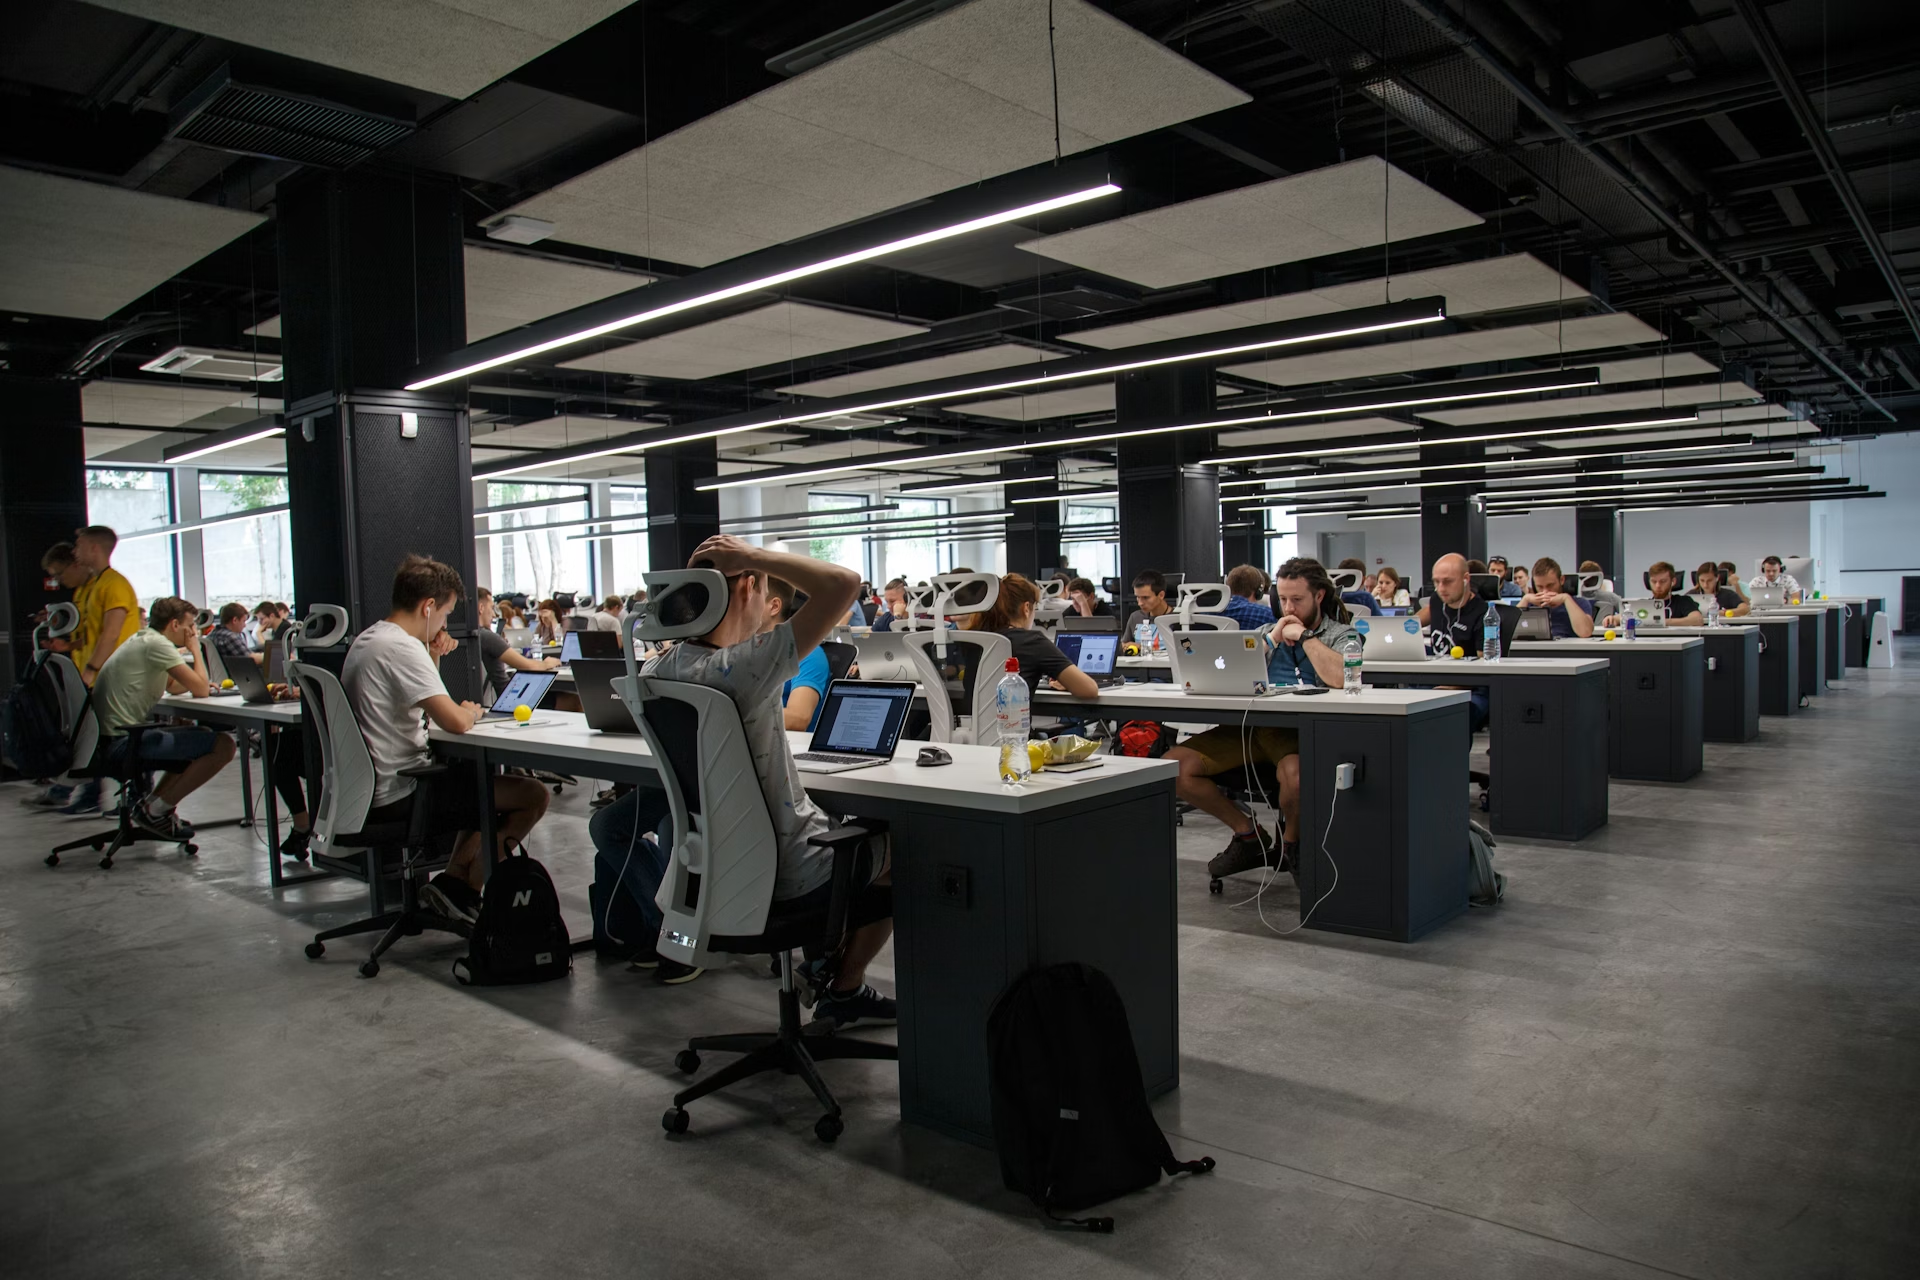

In [8]:
from openai import OpenAI
from dotenv import load_dotenv
import os

load_dotenv()
api_key = os.getenv("OPENAI_API_KEY")

client = OpenAI(api_key=api_key)

messages = [
    {
        "role": "user",
        "content": [
            {"type": "text", "text": "이 이미지에 대해 설명해주세요."},
            {
                "type": "image_url",
                "image_url": {
                    "url": "https://images.unsplash.com/photo-1504384308090-c894fdcc538d?ixlib=rb-4.0.3&auto=format&fit=crop&w=1920&q=90",
                },
            },
        ],
    }
]

response = client.chat.completions.create(
    model="gpt-4o",
    messages=messages
)

response

ChatCompletion(id='chatcmpl-D0Ta26uXgIDxIb1puIsTDvmt8yNad', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='이 이미지는 많은 사람들이 큰 사무실에서 컴퓨터로 작업하고 있는 모습입니다. 책상과 의자가 줄지어 배치되어 있으며, 사람들이 각자 노트북을 사용하고 있습니다. 천장에는 조명이 설치되어 있고, 넓고 현대적인 인테리어를 가진 공간입니다. 이곳은 협업 및 집중 업무를 위한 오픈 오피스 형태로 보입니다.', refusal=None, role='assistant', audio=None, function_call=None, tool_calls=None, annotations=[]))], created=1769006078, model='gpt-4o-2024-08-06', object='chat.completion', service_tier='default', system_fingerprint='fp_deacdd5f6f', usage=CompletionUsage(completion_tokens=86, prompt_tokens=1119, total_tokens=1205, completion_tokens_details=CompletionTokensDetails(accepted_prediction_tokens=0, audio_tokens=0, reasoning_tokens=0, rejected_prediction_tokens=0), prompt_tokens_details=PromptTokensDetails(audio_tokens=0, cached_tokens=0)))

## 실습. 내가 가진 이미지로 설명 요청하기
- OpenAI의 API에 사진 파일을 직접 보낼 수 없으므로 내가 갖고 있는 사진을 설명해 달라고 요쳥하려면 Base64를 이용해 이미지를 문자열로 변환해야 함
- Base64는 이진 데이터를 아스키 문자로 바꾸는 인코딩 방식으로 사람이 직접 읽기 편하지는 않지만 텍스트로 표현될 수 있는 형태가 되어 GPT에게 전달 가능

### 이미지를 base64로 변환하기

In [9]:
import base64

# 이미지를 인코딩하는 함수
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")
    
image_path = "./mangwon_bakery.jpg"

# 이미지를 base64로 인코딩
base64_image = encode_image(image_path)

print(base64_image)

/9j/4AAQSkZJRgABAQAAAQABAAD/4QBoRXhpZgAASUkqAAgAAAACADEBAgAHAAAAJgAAAGmHBAABAAAALgAAAAAAAABHb29nbGUAAAIAAJAHAAQAAAAwMjIwA5ACABQAAABMAAAAAAAAADIwMjA6MTA6MjUgMTU6NTg6NDkA/9sAhAADAgIKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCw0KCg0KCgoKAQMEBAYFBgoGBgoPDQsNDw8PDw8PDw0PDw8NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ3/wAARCAUaBs0DASIAAhEBAxEB/8QAHgAAAQQDAQEBAAAAAAAAAAAABQMEBgcBAggACQr/xABlEAACAQIDBQQHBQQHBAYFABsBAgMEEQASIQUGEzFBByJRYRQjMnGBkfAIQqGxwTNSctEVJGKCsuHxQ3OSogkWNFNjwhdEVIOTs9IYlKPD0yU1RXSExOJVZNSktPJWZXXjGSY2/8QAHAEAAgMBAQEBAAAAAAAAAAAAAwQBAgUABgcI/8QAQREAAgEDAwEFBwMDBAIBAwMFAAECAxEhBBIxQQUTIlFhMnGBkaGx8BTB0RVC4QYjUvEzYnIWQ4IkkqLCNFPSsv/aAAwDAQACEQMRAD8A63r1up92N9ntdVPkMbyrofdhDY/sDyuPkcYSNMfqMZGMAY3GLM49bDTZ/Nvfh7bDKmXvt5j9cVOH+PYyRjF8ccZUYGMLTDzVv/KcFMC682kjPnb5g/qMQcFAMeGPY8cXINrYGbW0aM/2gPmbfrgkMDtveyD4EH5EHEMkJjGcarjbEkHhgXvJ7F/Ag/Ig/pgoMMdvpeNvrxxDJH4GM4SpJLqp8QD8wDhS2JIMjDLbfsE/XI4eE4b7TW6HHMqOlbHsI0T3VT4qPyGF8ccZBwP263cv4G/18sP8M9tLeNvryxzJ

### base64로 변환한 이미지 설명 요청하기
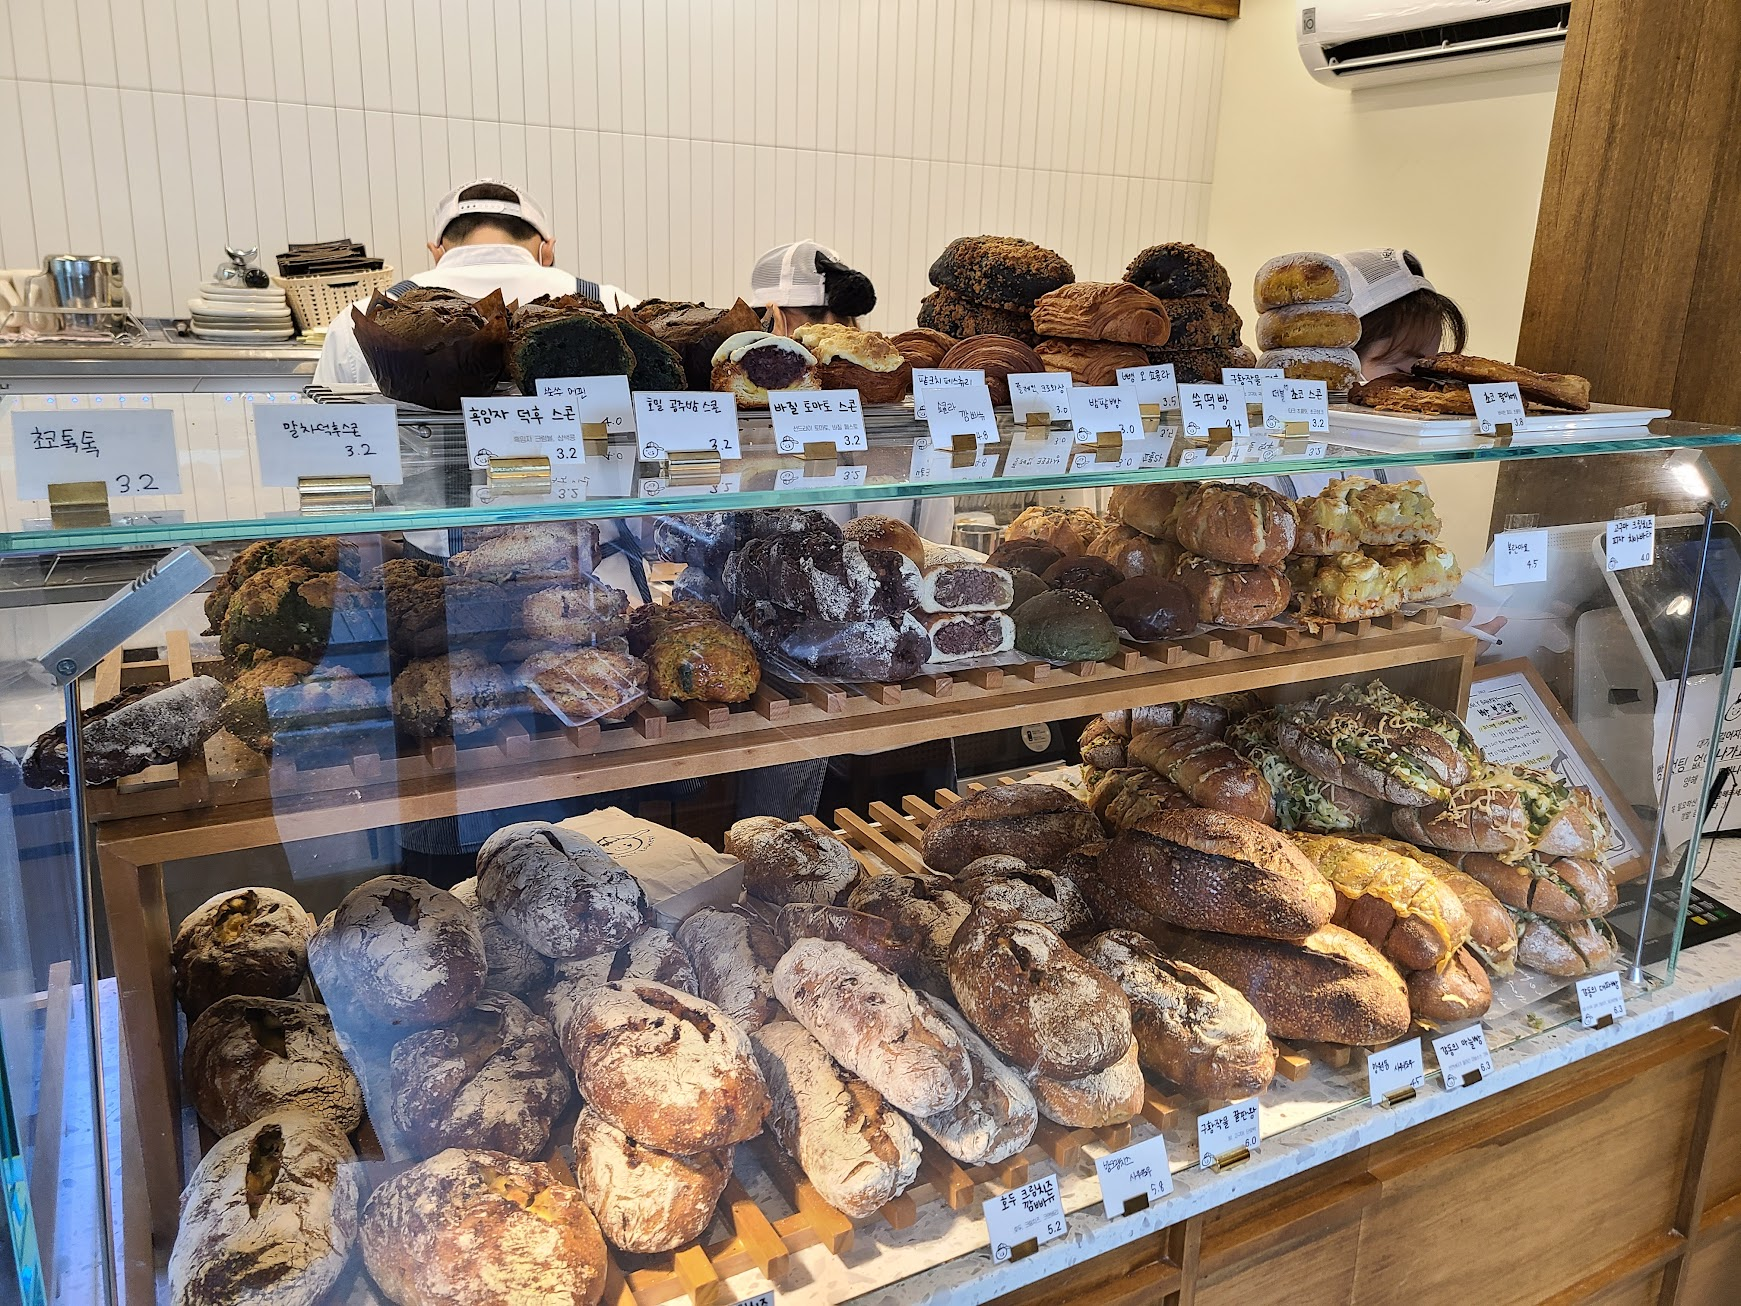

In [10]:
messages = [
    {
        "role": "user",
        "content": [
            {"type": "text", "text": "이 이미지에 대해 설명해주세요."},
            {
                "type": "image_url",
                "image_url": {
                    "url": f"data:image/jpeg;base64,{base64_image}",
                },
            },
        ],
    }
]

response = client.chat.completions.create(
    model="gpt-4o",
    messages=messages
)

response.choices[0].message.content

'이 이미지는 베이커리의 디스플레이 케이스를 보여줍니다. 다양한 종류의 신선한 빵과 페이스트리들이 진열되어 있으며, 제품명과 가격이 적힌 작은 표지판들이 각각의 아이템 앞에 놓여 있습니다. 빵들은 여러 가지 종류와 모양으로 구비되어 있으며 뒤에 두 명의 직원이 있는 모습도 보입니다. 전체적으로 깔끔하고 정돈된 분위기의 베이커리입니다.'

### 여러 이미지 설명 요청하기
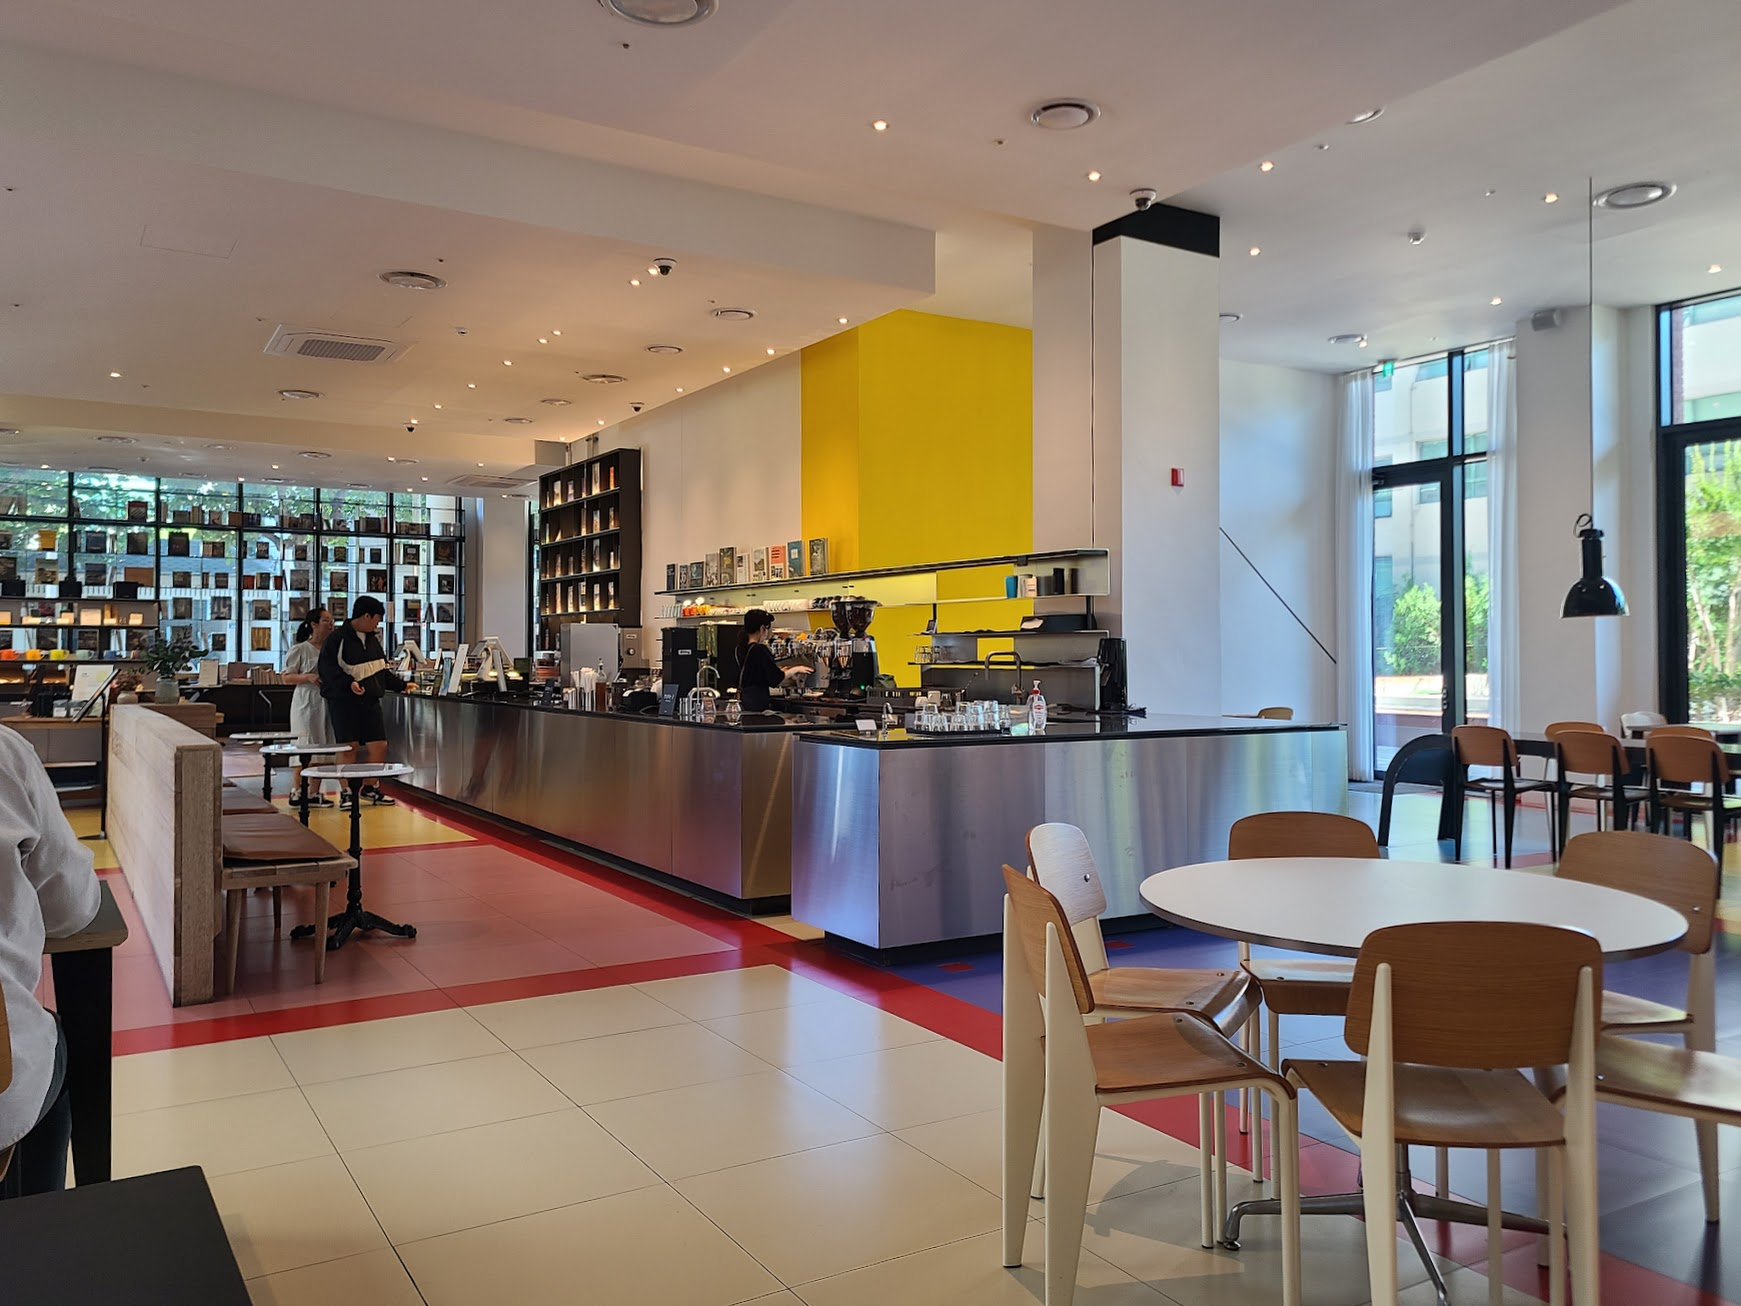
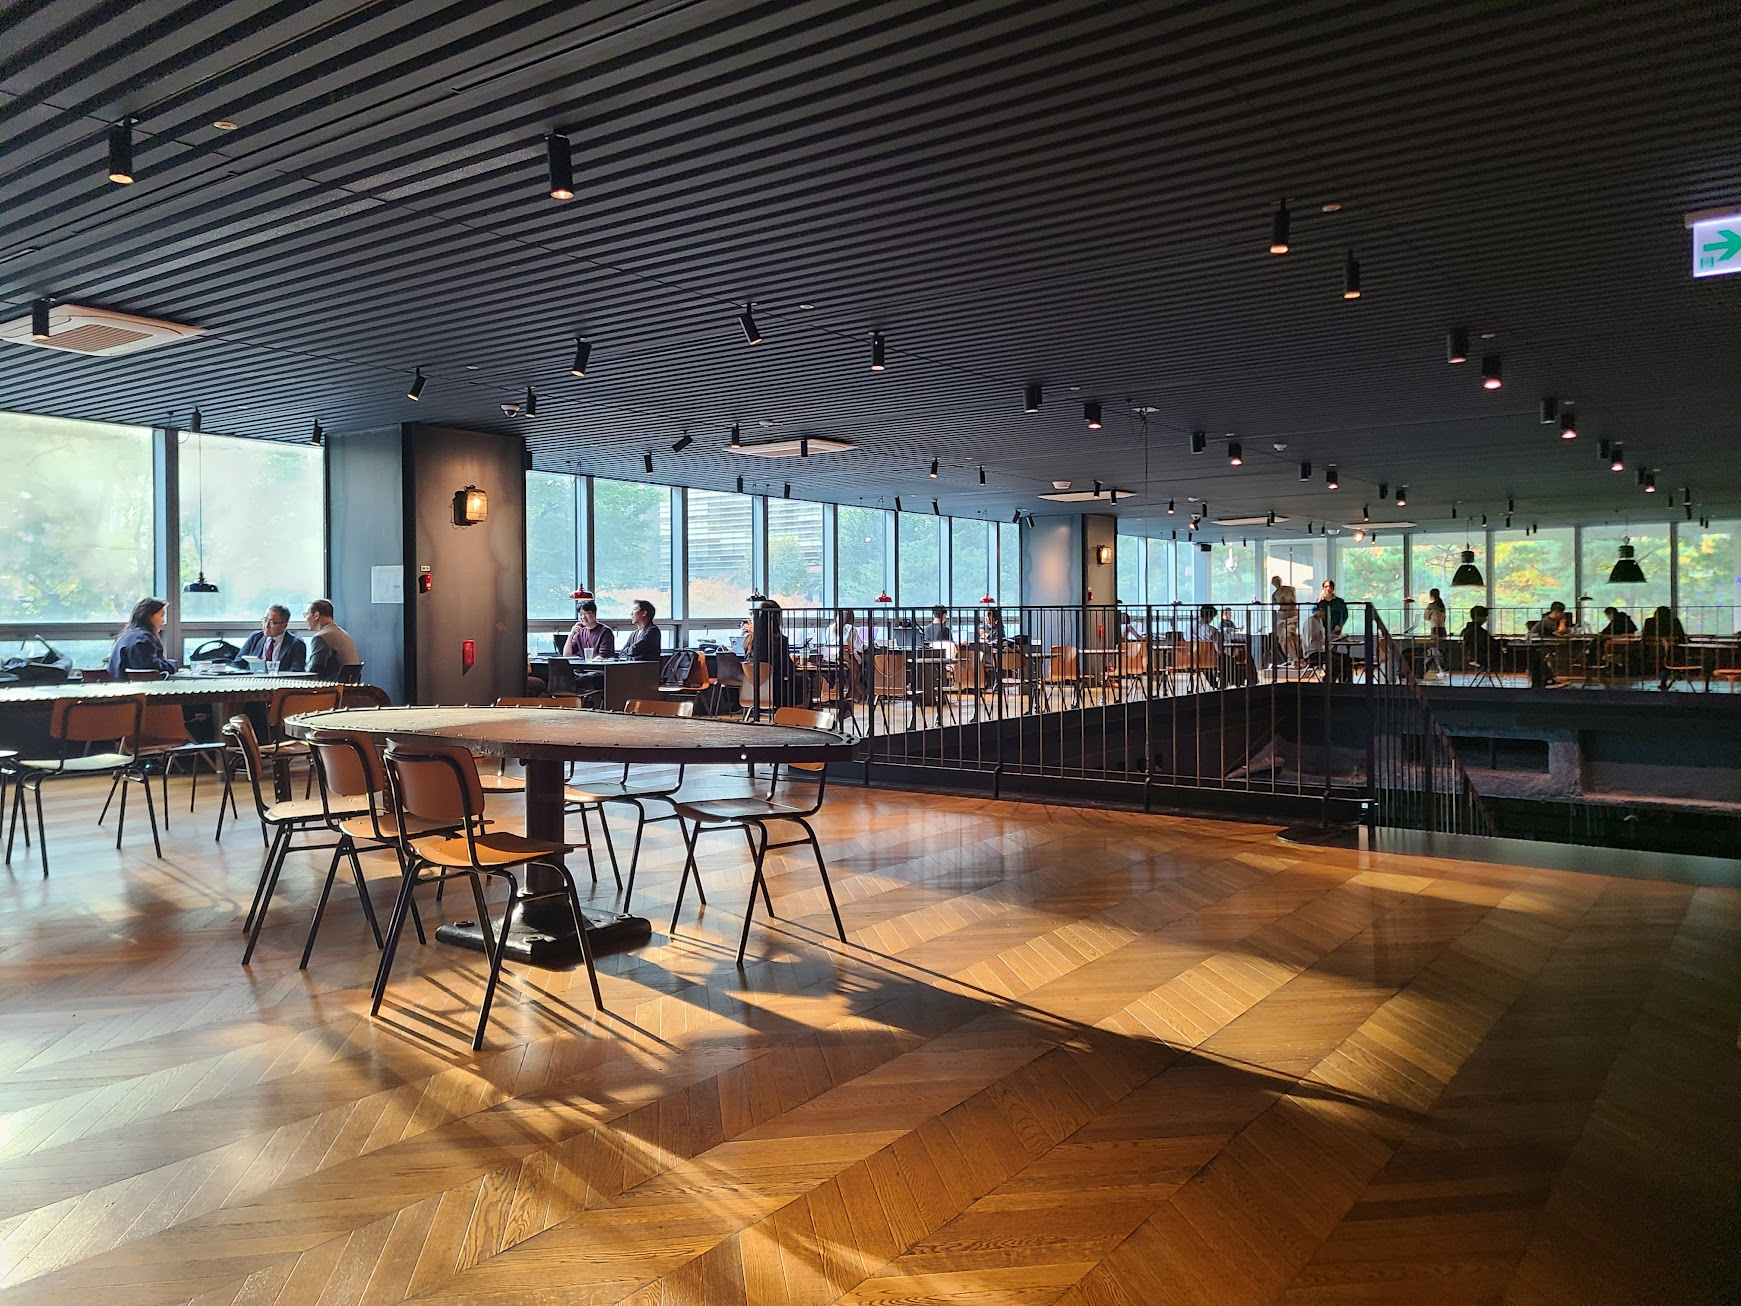

In [14]:
seolleung_terrarosa_base64 = encode_image("./seolleung_terrarosa.jpg")
local_stitch_terrarosa_base64 = encode_image("./local_stitch_terrarosa.jpg")

messages = [
    {
        "role": "user",
        "content": [
            {"type": "text", "text": "두 카페의 차이점을 설명해 주세요."},
            {
                "type": "image_url",
                "image_url": {
                    "url": f"data:image/jpeg;base64,{seolleung_terrarosa_base64}",
                },
            },
            {
                "type": "image_url",
                "image_url": {
                    "url": f"data:image/jpeg;base64,{local_stitch_terrarosa_base64}",
                },
            },
        ],
    }
]

response = client.chat.completions.create(
    model="gpt-4o",
    messages=messages
)

response.choices[0].message.content

'두 카페는 인테리어와 분위기에서 차이가 있습니다.\n\n1. 첫 번째 카페:\n   - **조명**: 은은한 조명으로 따뜻하고 차분한 분위기를 자아냅니다.\n   - **디자인**: 주로 나무 바닥과 어두운 톤의 색상이 사용되어 클래식하고 고급스러운 느낌을 줍니다.\n   - **구조**: 넓고 개방된 공간에 많은 좌석이 배치되어 있으며, 창문을 통해 자연광이 들어옵니다.\n\n2. 두 번째 카페:\n   - **조명**: 밝은 조명과 대조적인 색상 조합으로 현대적이고 깨끗한 느낌을 줍니다.\n   - **디자인**: 밝은 색상과 유리 테이블, 메탈 소재의 카운터가 돋보여 세련된 인테리어를 연출합니다.\n   - **구조**: 비교적 작고 아기자기한 공간으로, 밝고 쾌적한 분위기를 제공합니다.\n\n각 카페는 고유의 스타일과 분위기를 통해 서로 다른 경험을 제공합니다.'

Base64의 장점 3가지
1. 전송, 저장 시 호환성
    - 이미지를 포함한 각종 파일을 텍스트 형태로 변환하면 다양한 환경에서 아무 문제없이 데이터를 전송하거나 저장 가능
2. 데이터 손상 방지
    - Base64로 인코딩하면 아스키 문자로만 이루어져 있어 문자 인코딩 충돌 없이 안전하게 주고받을 수 있음
3. 프로토콜과의 호환성
    - 이메일 전송이나 특히 MIME에서는 본문에 이미지나 첨부 파일을 삽입할 때 Base64 방식 사용

### GPT 비전의 한계 알아보기
- 한국과학기술기획평가원 2021년과 202년 OECD 가입국의 연구개발비 비교
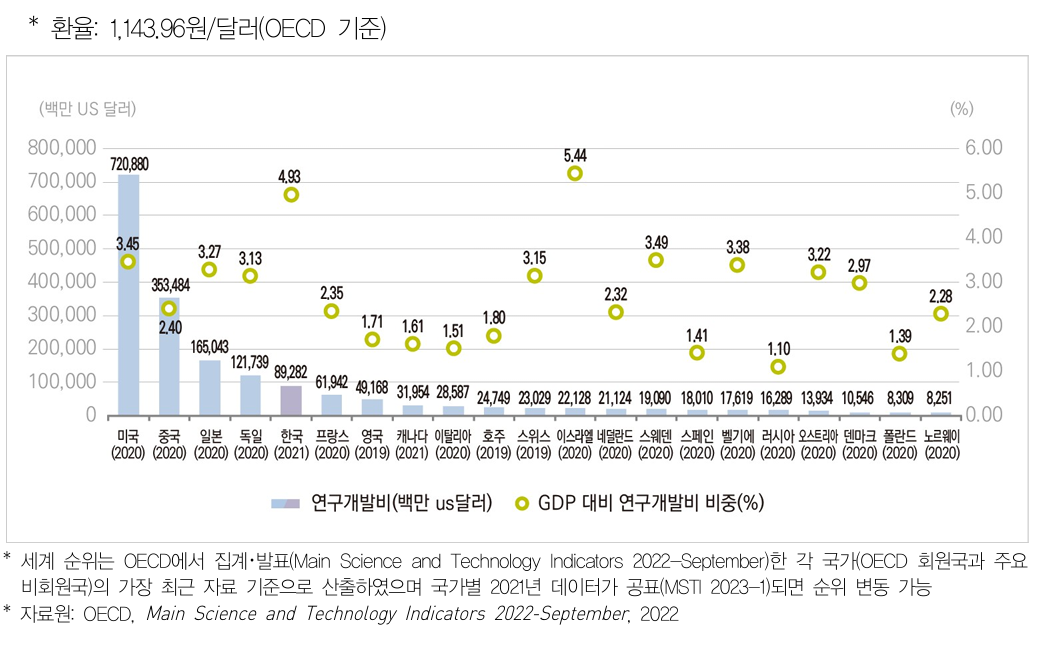
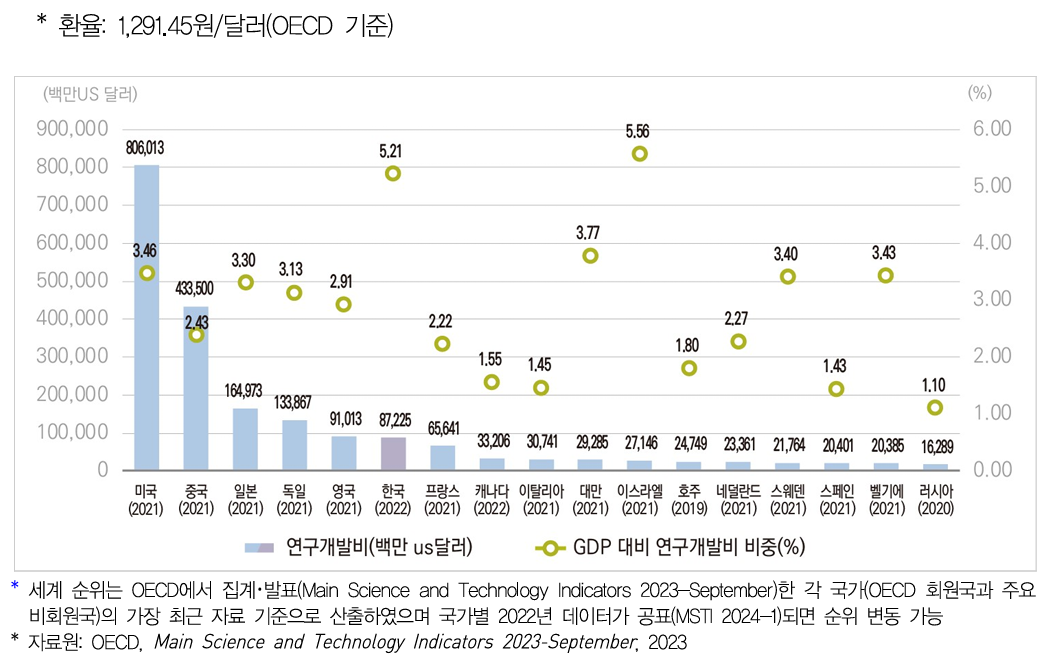

In [ ]:
oecd_rnd_2021_base64 = encode_image("./oecd_rnd_2021_large.png")
oecd_rnd_2022_base64 = encode_image("./oecd_rnd_2022.png")

messages = [
    {
        "role": "user",
        "content": [
            {"type": "text", "text": "첫 번째는 2021년 데이터고, 두 번째는 2022년 데이터입니다. 이 데이터에 대해 설명해 주세요. 어떤 변화가 있었나요? 한국 중심으로 설명해 주세요."},
            {
                "type": "image_url",
                "image_url": {
                    "url": f"data:image/jpeg;base64,{oecd_rnd_2021_base64}",
                },
            },
            {
                "type": "image_url",
                "image_url": {
                    "url": f"data:image/jpeg;base64,{oecd_rnd_2022_base64}",
                },
            },
        ],
    }
]

response = client.chat.completions.create(
    model="gpt-4o",
    messages=messages
)

response.choices[0].message.content

"""
두 이미지에서 한국의 연구개발비와 GDP 대비 연구개발비 비중을 중심으로 살펴보겠습니다.

연구개발비(백만 US달러)

- 2021년: 89,282백만 달러
- 2022년: 91,013백만 달러

GDP 대비 연구개발비 비중(%)
- 2021년: 4.93%
- 2022년: 4.93%

변화 점
1. 연구개발비 증가: 약간 증가하여 한국의 연구개발비가 2021년에서 2022년으로 1,731백만 달러 상승했습니다.
2. GDP 대비 비중 유지: 2021년과 2022년 모두 4.93%로 GDP 대비 연구개발비 비중은 변동이 없었습니다.

이러한 데이터를 통해 한국은 연구개발비를 지속적으로 증가시키고 있으며, 경제 규모 대비 일정한 투자 비율을 유지하는 것으로 보입니다. 이는 한국이 지속적으로 연구개발에 많은 관심과 투자를 하고 있다는 점을 보여줍니다.
"""

'두 이미지에서 한국의 연구개발비와 GDP 대비 연구개발비 비중을 중심으로 살펴보겠습니다.\n\n### 연구개발비(백만 US달러)\n- **2021년**: 89,282백만 달러\n- **2022년**: 91,013백만 달러\n\n### GDP 대비 연구개발비 비중(%)\n- **2021년**: 4.93%\n- **2022년**: 4.93%\n\n### 변화 점\n1. **연구개발비 증가**: 약간 증가하여 한국의 연구개발비가 2021년에서 2022년으로 1,731백만 달러 상승했습니다.\n2. **GDP 대비 비중 유지**: 2021년과 2022년 모두 4.93%로 GDP 대비 연구개발비 비중은 변동이 없었습니다.\n\n이러한 데이터를 통해 한국은 연구개발비를 지속적으로 증가시키고 있으며, 경제 규모 대비 일정한 투자 비율을 유지하는 것으로 보입니다. 이는 한국이 지속적으로 연구개발에 많은 관심과 투자를 하고 있다는 점을 보여줍니다.'

### 해상도가 조금 낮은 2021 이미지로 변경
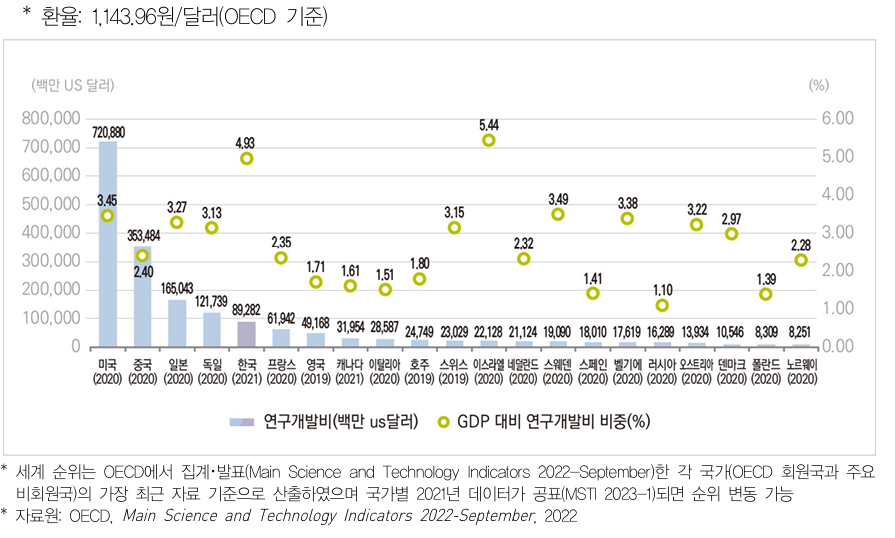

In [ ]:
oecd_rnd_2021_base64 = encode_image("./oecd_rnd_2021_medium.png")
oecd_rnd_2022_base64 = encode_image("./oecd_rnd_2022.png")

messages = [
    {
        "role": "user",
        "content": [
            {"type": "text", "text": "첫 번째는 2021년 데이터고, 두 번째는 2022년 데이터입니다. 이 데이터에 대해 설명해 주세요. 어떤 변화가 있었나요? 한국 중심으로 설명해 주세요."},
            {
                "type": "image_url",
                "image_url": {
                    "url": f"data:image/jpeg;base64,{oecd_rnd_2021_base64}",
                },
            },
            {
                "type": "image_url",
                "image_url": {
                    "url": f"data:image/jpeg;base64,{oecd_rnd_2022_base64}",
                },
            },
        ],
    }
]

response = client.chat.completions.create(
    model="gpt-4o",
    messages=messages
)

response.choices[0].message.content

"""
두 이미지에서 한국의 연구개발비와 GDP 대비 연구개발비 비중을 중심으로 살펴보겠습니다.

연구개발비(백만 US달러)
- 2021년: 89,282백만 달러
- 2022년: 91,013백만 달러

GDP 대비 연구개발비 비중(%)
- 2021년: 4.93%
- 2022년: 4.93%

변화 점
1. 연구개발비 증가: 약간 증가하여 한국의 연구개발비가 2021년에서 2022년으로 1,731백만 달러 상승했습니다.
2. GDP 대비 비중 유지: 2021년과 2022년 모두 4.93%로 GDP 대비 연구개발비 비중은 변동이 없었습니다.

이러한 데이터를 통해 한국은 연구개발비를 지속적으로 증가시키고 있으며, 경제 규모 대비 일정한 투자 비율을 유지하는 것으로 보입니다. 이는 한국이 지속적으로 연구개발에 많은 관심과 투자를 하고 있다는 점을 보여줍니다.
"""

'\n두 이미지에서 한국의 연구개발비와 GDP 대비 연구개발비 비중을 중심으로 살펴보겠습니다.\n\n연구개발비(백만 US달러)\n\n- 2021년: 89,282백만 달러\n- 2022년: 91,013백만 달러\n\nGDP 대비 연구개발비 비중(%)\n- 2021년: 4.93%\n- 2022년: 4.93%\n\n변화 점\n1. 연구개발비 증가: 약간 증가하여 한국의 연구개발비가 2021년에서 2022년으로 1,731백만 달러 상승했습니다.\n2. GDP 대비 비중 유지: 2021년과 2022년 모두 4.93%로 GDP 대비 연구개발비 비중은 변동이 없었습니다.\n\n이러한 데이터를 통해 한국은 연구개발비를 지속적으로 증가시키고 있으며, 경제 규모 대비 일정한 투자 비율을 유지하는 것으로 보입니다. 이는 한국이 지속적으로 연구개발에 많은 관심과 투자를 하고 있다는 점을 보여줍니다.\n'

- 고차원적인 목적에는 적합하지 않을 수 있다.
- 한계가 있다는 점 인지해야 한다.